In [1]:
!pip install mediapipe


In [7]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
# Set up Mediapipe library
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

image_path = '/content/photo.jpeg'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Unable to load the image. Check the path.")
else:
    # Resize the image to fit the screen (e.g., width 800 pixels)
    image = cv2.resize(image, (800, int(image.shape[0] * 800 / image.shape[1])))

    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get face landmarks
    results = face_mesh.process(image_rgb)

    # If a face was detected
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks = []
            for landmark in face_landmarks.landmark:
                h, w, _ = image.shape
                x, y, z = int(landmark.x * w), int(landmark.y * h), landmark.z
                landmarks.append((x, y, z))
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Draw landmarks on the image

# Define the alternative landmarks function
def get_landmark(index, default=(0, 0, 0)):
    return landmarks[index] if index < len(landmarks) else default

# Use alternative landmarks if some points are not clear
nose_tip = get_landmark(1)
chin = get_landmark(152)
left_eye = get_landmark(33)
right_eye = get_landmark(263)

if nose_tip != (0, 0, 0) and chin != (0, 0, 0) and left_eye != (0, 0, 0) and right_eye != (0, 0, 0):
    # Calculate Roll, Pitch, Yaw using the appropriate landmarks
    roll = np.arctan2(right_eye[1] - left_eye[1], right_eye[0] - left_eye[0])
    pitch = np.arctan2(chin[1] - nose_tip[1], chin[2] - nose_tip[2])
    yaw = np.arctan2(nose_tip[0] - chin[0], nose_tip[2] - chin[2])

    roll_deg = np.degrees(roll)
    pitch_deg = np.degrees(pitch)
    yaw_deg = np.degrees(yaw)

    # Print Roll, Pitch, Yaw
    print(f"Roll: {roll_deg:.2f}°")
    print(f"Pitch: {pitch_deg:.2f}°")
    print(f"Yaw: {yaw_deg:.2f}°")

    # Draw head pose axes
    nose_point = np.array([nose_tip[0], nose_tip[1]], dtype=int)
    axis_length = 100

    # Roll axis (green)
    x_axis_point = (int(nose_tip[0] + axis_length * np.cos(roll)),
                    int(nose_tip[1] + axis_length * np.sin(roll)))
    cv2.arrowedLine(image, tuple(nose_point), x_axis_point, (0, 255, 0), 2)

    # Pitch axis (red)
    y_axis_point = (int(nose_tip[1]), int(nose_tip[1] - axis_length * np.cos(pitch)))
    cv2.arrowedLine(image, tuple(nose_point), y_axis_point, (0, 0, 255), 2)

    # Yaw axis (blue)
    z_axis_point = (int(nose_tip[0] + axis_length * np.sin(yaw)),
                    int(nose_tip[1] - axis_length * np.cos(yaw)))
    cv2.arrowedLine(image, tuple(nose_point), z_axis_point, (255, 0, 0), 2)

    # Write Roll, Pitch, Yaw on the image
    text = (f"Roll: {roll_deg:.2f}°\n"
            f"Pitch: {pitch_deg:.2f}°\n"
            f"Yaw: {yaw_deg:.2f}°")
    cv2.putText(image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (2, 2, 255), 2, cv2.LINE_AA)
else:
    print("Some landmarks are not visible. Cannot compute head pose.")


Roll: 0.00°
Pitch: 89.95°
Yaw: -92.70°


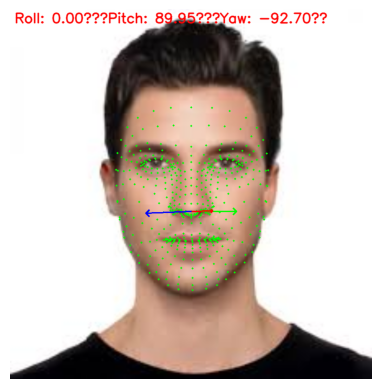

In [8]:
# Display the image using matplotlib
import matplotlib.pyplot as plt

# Convert image to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()
